In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Visualization settings
sns.set(style="whitegrid")


In [2]:
# Load with proper headers
cols = ["Tweet_ID", "Topic", "Sentiment", "Tweet"]
train = pd.read_csv("twitter_training.csv", header=None, names=cols)
val = pd.read_csv("twitter_validation.csv", header=None, names=cols)

# Combine datasets for global analysis
df = pd.concat([train, val], ignore_index=True)

# Quick look
print(df.head())


   Tweet_ID        Topic Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                               Tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


C:\Users\DAKSH AGHERA\AppData\Local\Temp\ipykernel_22560\1741194847.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2', order=df['Sentiment'].value_counts().index)


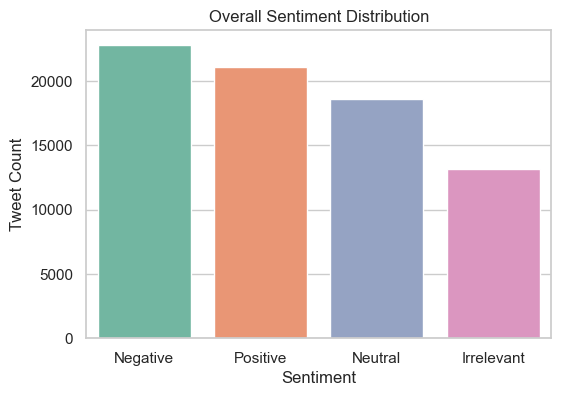

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='Set2', order=df['Sentiment'].value_counts().index)
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()


C:\Users\DAKSH AGHERA\AppData\Local\Temp\ipykernel_22560\1256956721.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_topics.index, y=top_topics.values, palette='coolwarm')


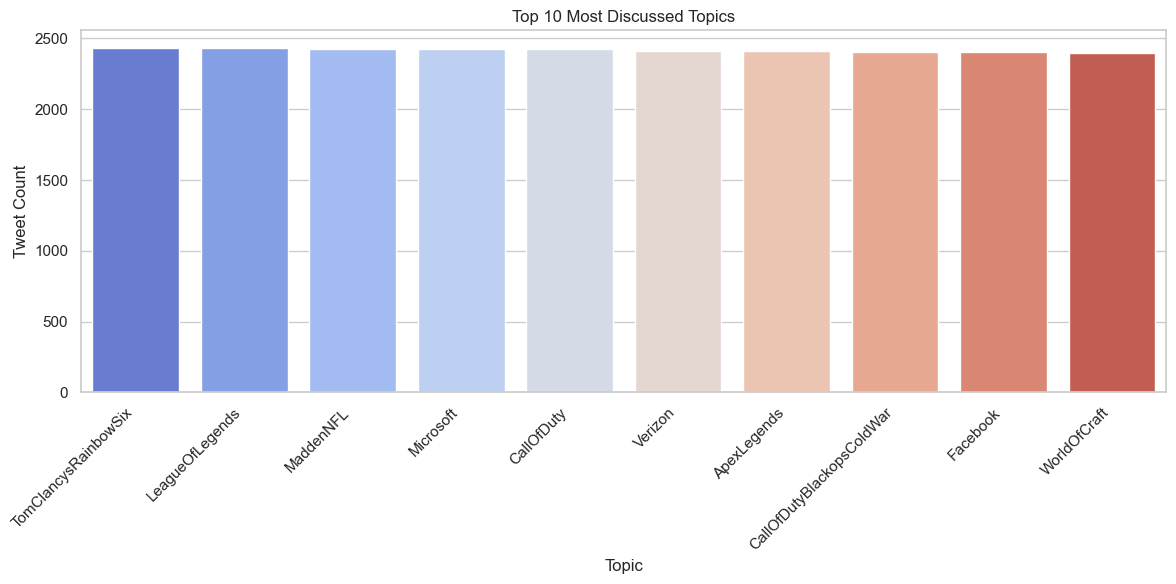

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_topics.index, y=top_topics.values, palette='coolwarm')

plt.title("Top 10 Most Discussed Topics")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45, ha='right')  # Rotate labels and align right
plt.tight_layout()  # Prevent clipping
plt.show()


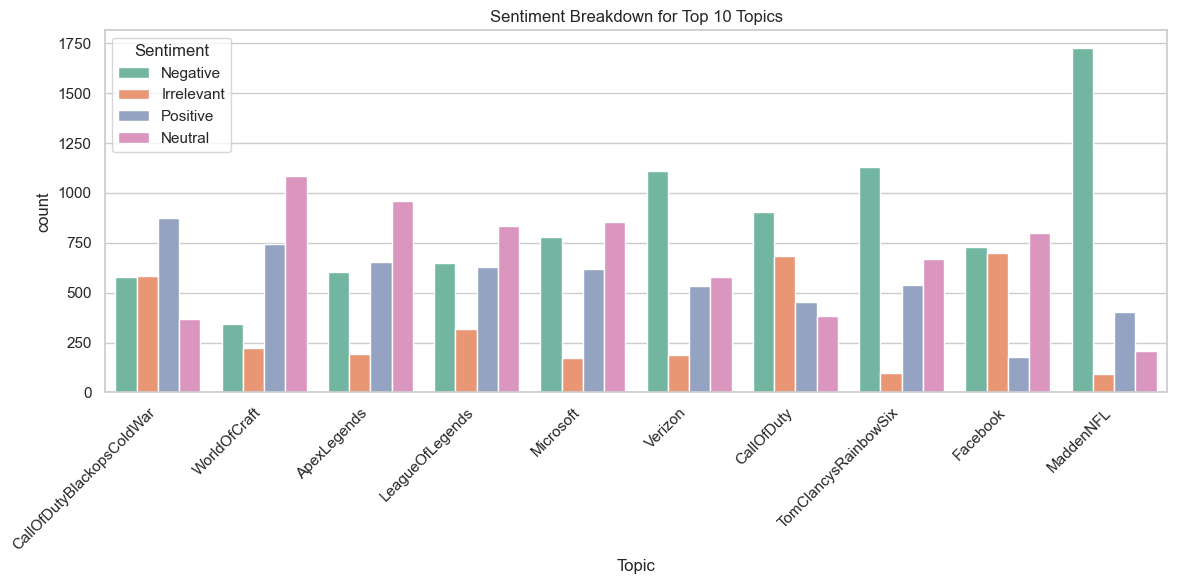

In [7]:
top_entities = df['Topic'].value_counts().nlargest(10).index
filtered = df[df['Topic'].isin(top_entities)]

plt.figure(figsize=(12,6))
sns.countplot(data=filtered, x='Topic', hue='Sentiment', palette='Set2')
plt.title('Sentiment Breakdown for Top 10 Topics')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.legend(title='Sentiment')
plt.show()


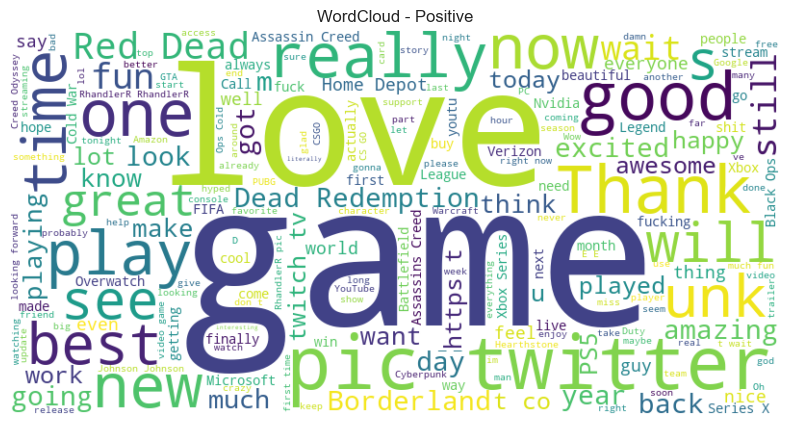

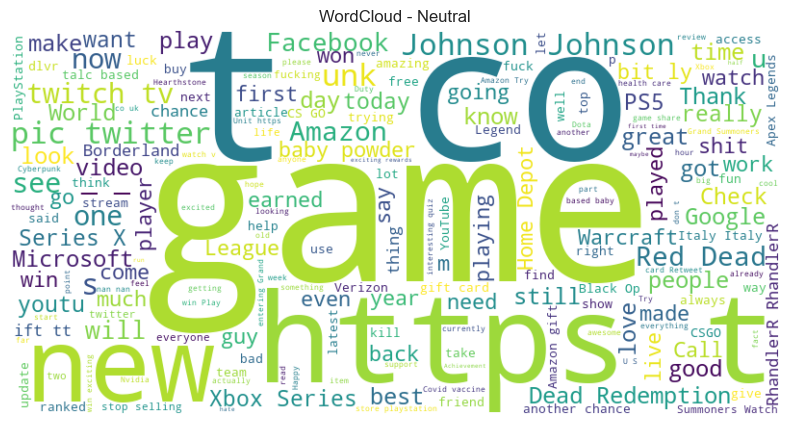

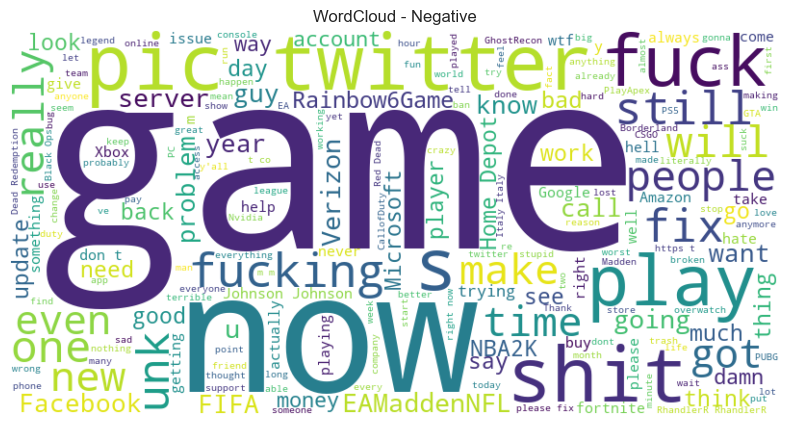

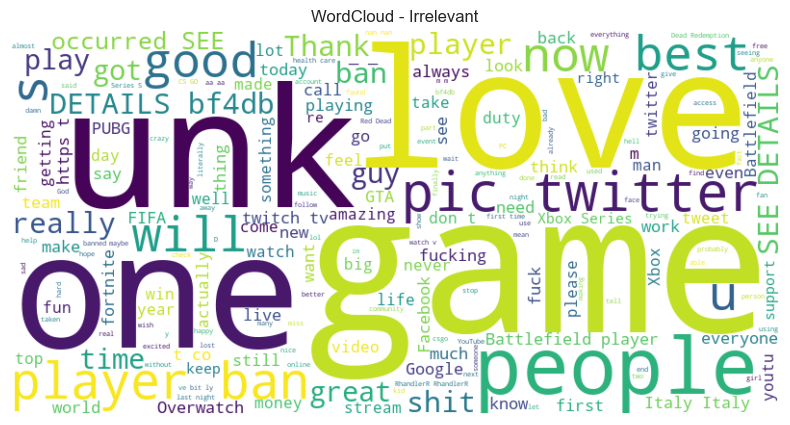

In [8]:
for sentiment in df['Sentiment'].unique():
    text = " ".join(df[df['Sentiment'] == sentiment]['Tweet'].astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - {sentiment}")
    plt.show()
